## Bored with Common data

    Do some practice with your daily routine!!! 😁
    
    
    Let's Start the Fun!!!!

### NETFLIX_EXERCISE_Solution - Jay Joshi

A dataset of Netflix Movies and TV Show. Perform Exploratory data Analysis and Visualisation and answer the following question depending on analysis.

In [1]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

### 1. read the dataset and store it into a variable

In [2]:
netflix= pd.read_csv("netflix_titles.csv", sep=',')

### 2. Prepare the dataset as follows

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix['season'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)

In [5]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,


In [6]:
netflix['duration'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [7]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,


### 3. Content Type on netflix

In [8]:
freq= netflix.groupby('type').count()['show_id'].to_frame()
freq.reset_index(inplace=True)
freq

,type,show_id
0,Movie,4265
1,TV Show,1969


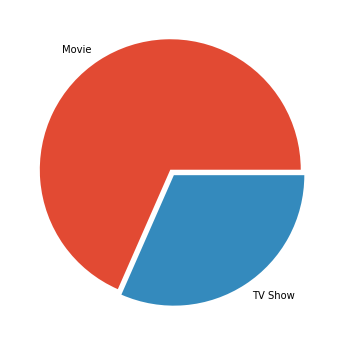

In [9]:
fig,ax = plt.subplots(figsize=(6,6))
ax.pie('show_id',labels='type',data=freq, explode=[0,0.05])
plt.show()

### 4. Growth in content over the years

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
netflix["date_added"]=netflix["date_added"].astype("datetime64")
x=netflix[["type","date_added"]]
x["year"]=x["date_added"].apply(lambda x:x.year)
movie=x[x['type']=="Movie"]["year"].value_counts()
movie=movie.sort_index()
show=x[x['type']=="TV Show"]["year"].value_counts()
show=show.sort_index()

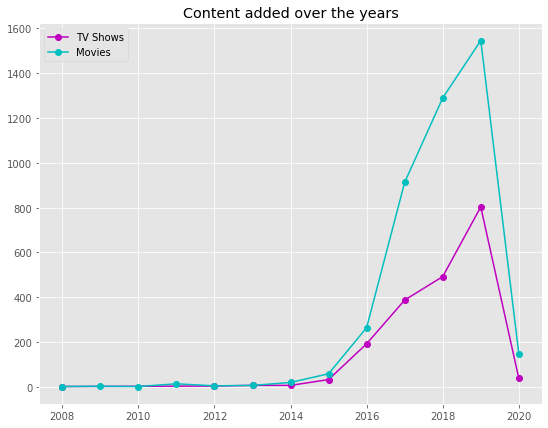

In [11]:
fig=plt.figure(figsize=(9,7))
plt.plot(show,"-om",label="TV Shows")
plt.plot(movie,"-oc",label="Movies")
plt.legend()
plt.title("Content added over the years")
plt.show()

### 5. Original Release Year of the movies

In [12]:
movie=netflix[netflix["type"]=="Movie"]["release_year"].value_counts().sort_values()
show=netflix[netflix["type"]=="TV Show"]["release_year"].value_counts().sort_values()

In [13]:
movie

1956      1
1954      1
1966      1
1970      1
1964      1
       ... 
2015    363
2019    400
2016    593
2018    646
2017    682
Name: release_year, Length: 70, dtype: int64

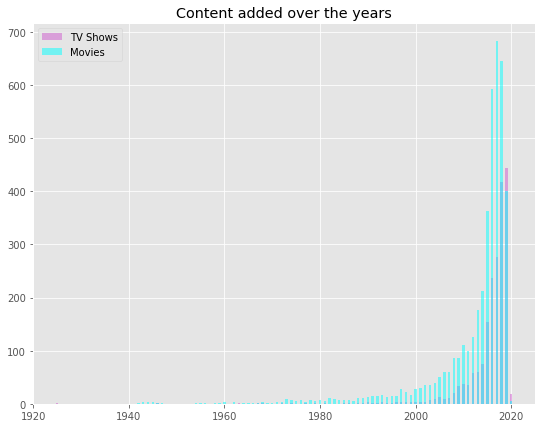

In [14]:
fig=plt.figure(figsize=(9,7))
plt.bar(show.index,show,color="m",width=0.5,label="TV Shows",alpha=0.3)
plt.bar(movie.index,movie,alpha=0.5,color="cyan",width=0.5,label="Movies")
plt.legend()
plt.title("Content added over the years")
plt.show()

### 6. Some of the oldest movies on Netflix

In [15]:
movie = netflix[netflix['type'] == "Movie"]
old_movies=movie[['title','release_year']].sort_values(by='release_year', ascending=True)

In [16]:
old_movies.head(15)

,title,release_year
2013,The Battle of Midway,1942
2011,Prelude to War,1942
2023,Why We Fight: The Battle of Russia,1943
2026,WWII: Report from the Aleutians,1943
2022,Undercover: How to Operate Behind Enemy Lines,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,1944
2019,The Negro Soldier,1944
2021,Tunisian Victory,1944
2009,Nazi Concentration Camps,1945
2005,Know Your Enemy - Japan,1945


### 7. Some of the oldest TV Shows on Netflix

In [17]:
tv = netflix[netflix['type'] == "TV Show"]
old_tv=tv[['title','release_year']].sort_values(by='release_year', ascending=True)

In [18]:
old_tv.head(15)

,title,release_year
4292,Pioneers: First Women Filmmakers*,1925
4079,Pioneers of African-American Cinema,1946
5981,The Twilight Zone (Original Series),1963
5980,The Andy Griffith Show,1967
5704,Star Trek,1968
614,Monty Python's Fliegender Zirkus,1972
5669,Monty Python's Flying Circus,1974
5830,Dad's Army,1977
4273,El Chavo,1979
4369,Ninja Hattori,1981


### 8.  Distribution of Movie Duration

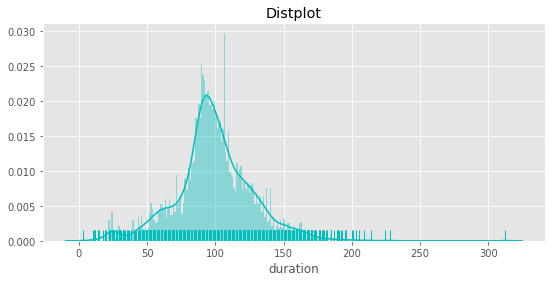

In [19]:
fig=plt.figure(figsize=(9,4))
x=netflix[netflix['type']=="Movie"]["duration"]
sns.distplot(x,bins=300,color="c",rug=True)
plt.title("Distplot")
plt.show()

### 9. TV Shows with how many seasons

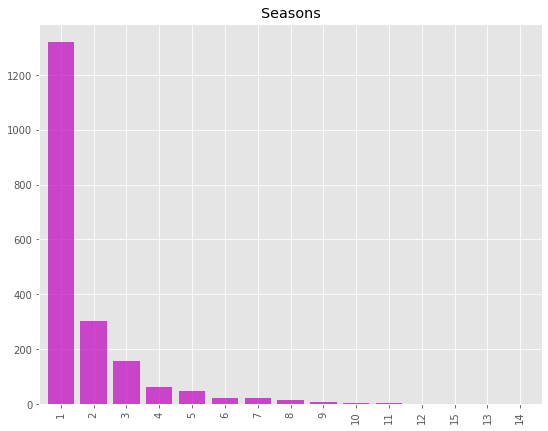

In [20]:
x=netflix["season"].value_counts()
fig=plt.figure(figsize=(9,7))
x[1:].plot(kind="bar",color="m",width=0.8,alpha=0.7)
plt.title("Seasons")
plt.show()

### 10.  What are the ratings of content

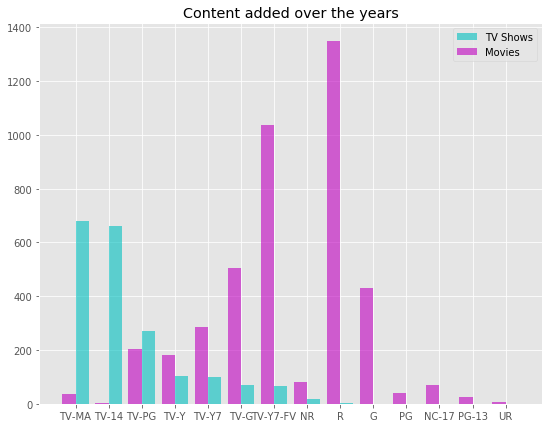

In [21]:
x=netflix[["type","rating"]]
movie=x[x['type']=="Movie"]["rating"].value_counts().sort_index()
show=x[x['type']=="TV Show"]["rating"].value_counts()
show["NC-17"]=0
show["PG-13"]=0
show["UR"]=0
shhow=show.sort_index()
import numpy as np
y=np.arange(0,14)
fig=plt.figure(figsize=(9,7))
plt.bar(y+0.2,show,width=0.4,color="c",label="TV Shows",alpha=0.6)
plt.bar(y-0.2,movie,width=0.4,color="m",label="Movies",alpha=0.6)
plt.xticks(y,show.index)
plt.title("Content added over the years")
plt.legend()
plt.show()

### 11. Top Actors on Netflix with Most Movies 
        Contries Wise Plot Bar Graph

In [22]:
x=netflix[netflix["type"]=="Movie"]["cast"]
y=""
for i in x:
    y+=str(i)+", "
x=y
# print(x)
x=pd.Series(x.split(", "))
print("Top 25 Actors in Movies")
x=x.value_counts()[1:26]
print(x)

Top 25 Actors in Movies
Anupam Kher          32
Shah Rukh Khan       30
Naseeruddin Shah     27
Om Puri              27
Akshay Kumar         26
Paresh Rawal         25
Amitabh Bachchan     24
Boman Irani          23
Kareena Kapoor       19
Kay Kay Menon        18
Gulshan Grover       18
John Cleese          17
Nicolas Cage         17
Jackie Shroff        16
Asrani               15
Ajay Devgn           15
Rajpal Yadav         15
James Franco         14
Danny Trejo          14
Manoj Bajpayee       14
Yashpal Sharma       14
Andrea Libman        14
Samuel L. Jackson    14
Amrish Puri          14
Anil Kapoor          14
dtype: int64


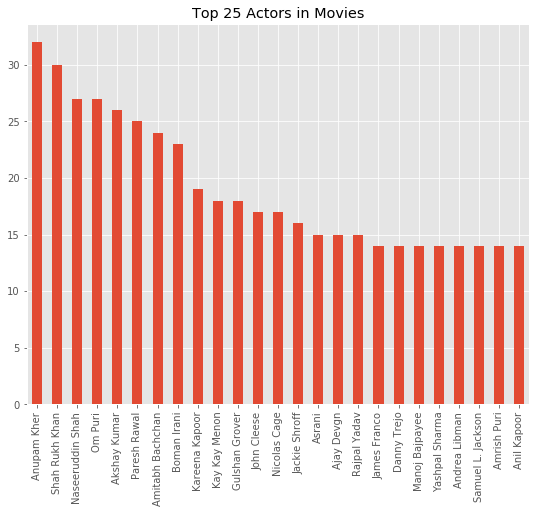

In [23]:
fig=plt.figure(figsize=(9,7))
x.plot(kind="bar")
plt.title("Top 25 Actors in Movies")
plt.show()

### 12. Top Actors on Netflix with Most TV Shows

In [24]:
x=netflix[netflix["type"]=="TV Show"]["cast"]
y=""
for i in x:
    y+=str(i)+", "
x=y
# print(x)
x=pd.Series(x.split(", "))
print("Top 25 Actors in TV Shows")
x=x.value_counts()[1:26]
print(x)

Top 25 Actors in TV Shows
Takahiro Sakurai            18
Yuki Kaji                   16
Daisuke Ono                 14
David Attenborough          14
Hiroshi Kamiya              12
Ashleigh Ball               12
Tomokazu Sugita             12
Jun Fukuyama                12
Mamoru Miyano               11
Yuichi Nakamura             11
Ai Kayano                   11
Tay Ping Hui                11
Junichi Suwabe              10
Kana Hanazawa                9
Brian Drummond               9
Saori Hayami                 9
Vincent Tong                 9
Takehito Koyasu              9
Kevin Michael Richardson     8
Eri Kitamura                 8
Andrea Libman                8
Kathleen Barr                8
Kenjiro Tsuda                8
Yoshimasa Hosoya             8
Katsuyuki Konishi            8
dtype: int64


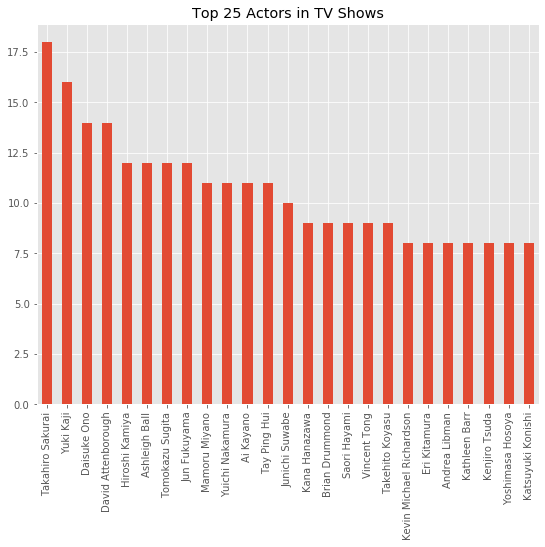

In [25]:
fig=plt.figure(figsize=(9,7))
x.plot(kind="bar")
plt.title("Top 25 Actors in TV Shows")
plt.show()

### 13. StandUp Comedies on Netflix

In [26]:
netflix[(netflix["listed_in"].apply(lambda x: True if "Stand-Up Comedy" in x else False)) & (netflix["country"]=="United States")][["title","country","release_year"]].head(10)

,title,country,release_year
53,Marc Maron: Too Real,United States,2017
113,Def Comedy Jam 25,United States,2017
126,Jeff Dunham: Beside Himself,United States,2019
134,Iliza Shlesinger: Confirmed Kills,United States,2016
181,Jerry Before Seinfeld,United States,2017
202,Sebastian Maniscalco: What's Wrong with People?,United States,2012
210,Cedric the Entertainer: Live from the Ville,United States,2016
260,Norm Macdonald Has a Show,United States,2018
288,Jeff Dunham: Relative Disaster,United States,2017
289,Daniel Sloss: Live Shows,United States,2018


In [27]:
netflix[(netflix["listed_in"].apply(lambda x: True if "Stand-Up Comedy" in x else False)) & (netflix["country"]=="India")][["title","country","release_year"]].head(10)

,title,country,release_year
2937,Aditi Mittal: Things They Wouldn't Let Me Say,India,2017
5420,Gangs of Hassepur,India,2014
